# Import dataset

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestCentroid
from sklearn import preprocessing


#https://www.kaggle.com/itachi9604/disease-symptom-description-dataset

filename = "dataset.csv"
filename2 = "symptom_Description.csv"
filename3 = "symptom_precaution.csv"
filename4 = "Symptom-severity.csv"
data1 = pd.read_csv(filename)
data2 = pd.read_csv(filename2)
data3 = pd.read_csv(filename3)
data4 = pd.read_csv(filename4)



print(data1.shape)

data1["Symptom_1"]

(4920, 18)


0                    itching
1                  skin_rash
2                    itching
3                    itching
4                    itching
                ...         
4915                vomiting
4916               skin_rash
4917     burning_micturition
4918               skin_rash
4919               skin_rash
Name: Symptom_1, Length: 4920, dtype: object

In [5]:
df_severity = data4
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [6]:
combined_data = pd.merge(data1, data2, on ='Disease')
combined_data = pd.merge(combined_data, data3, on='Disease')
combined_data.head(5)
#nullCheck = combined_data.isna().sum()
nullCheck = combined_data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
combined_data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
count,4560,4560,4560,4560,4212,3432,2814,2148,1824,1572,...,504,306,240,192,72,4560,4560,4560,4440,4440
unique,38,30,43,51,46,34,31,25,20,20,...,8,4,3,3,1,38,31,32,28,23
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain,"In humans, fungal infections occur when an inv...",Consult nearest hospital,medication,consult doctor,medication
freq,120,822,870,726,378,348,390,264,276,228,...,72,96,144,72,72,120,360,240,600,720


In [7]:
combined_data.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


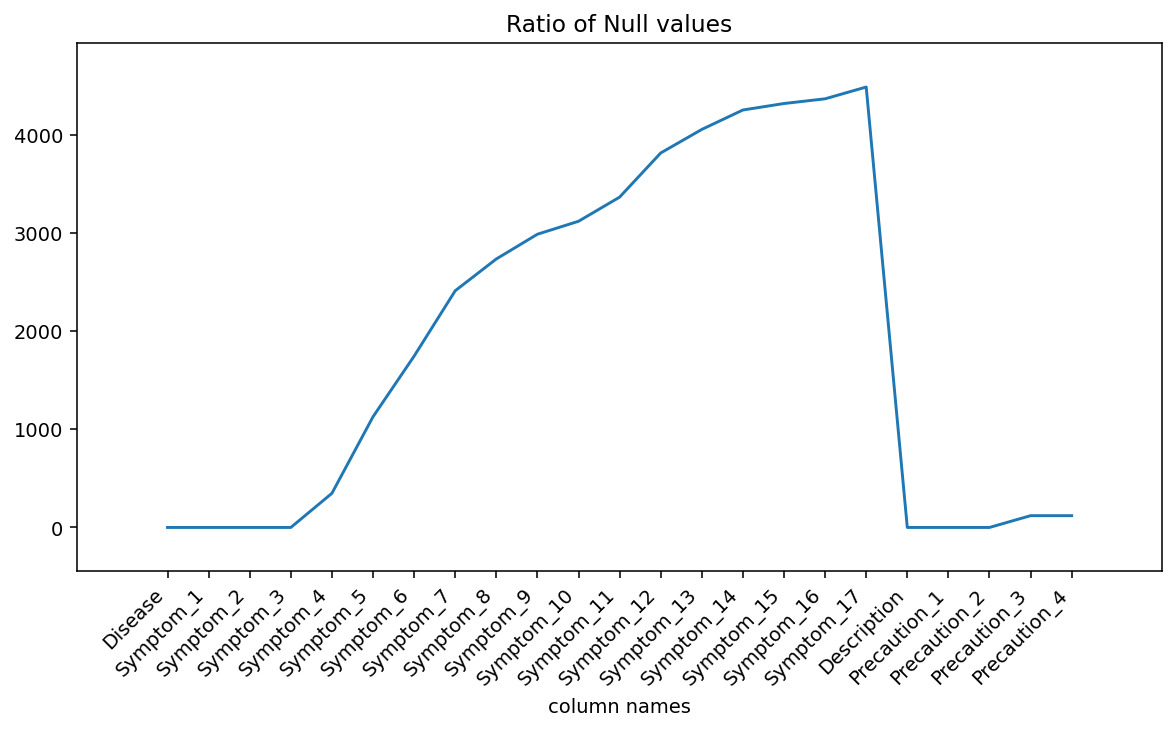

In [8]:
plt.figure(figsize=(10, 5), dpi=140)
plt.plot(nullCheck.index, nullCheck['count'])
plt.xticks(nullCheck.index, nullCheck.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [9]:
X = combined_data[['Symptom_1', 'Symptom_2', 'Symptom_3','Symptom_4','Symptom_5']]
labelE = LabelEncoder()
for i in X.columns:
    X[i] = labelE.fit_transform(X[i].astype(str))
y = combined_data['Disease']
print(X)
print(y)

      Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5
0            29         30         33         10         34
1            21         25         17         46         34
2            29         25         17         46         34
3            29         30         17         46         34
4            29         30         33         46         34
...         ...        ...        ...        ...        ...
4555         21         16          4         29         31
4556         21         16          4         29         31
4557         21         16          4         29         31
4558         21         16          4         29         31
4559         21         16          4         29         31

[4560 rows x 5 columns]
0       Fungal infection
1       Fungal infection
2       Fungal infection
3       Fungal infection
4       Fungal infection
              ...       
4555            Impetigo
4556            Impetigo
4557            Impetigo
4558            Impetigo
4559 

/var/folders/5p/lkh4b4h17fb_lbf80l_5jhh80000gn/T/ipykernel_15944/4068081669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = labelE.fit_transform(X[i].astype(str))


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print('score : ', model.score(X_test, y_test))


score :  0.993421052631579


In [11]:
y_test.head(5)

471     Chronic cholestasis
2646    Alcoholic hepatitis
23         Fungal infection
3477         Hypothyroidism
135                 Allergy
Name: Disease, dtype: object

Text(0, 0.5, 'Mean Error')

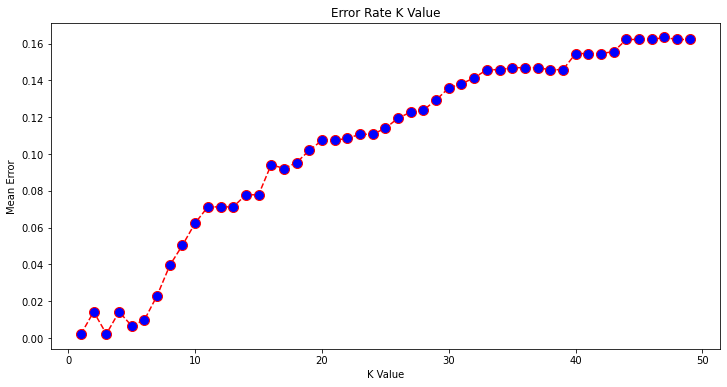

In [12]:
error = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [55]:
#Convert the y to numerical from categorical
le = preprocessing.LabelEncoder()
y_numerical = le.fit_transform(y)
print(type(X))

X_plottingdata = np.array(X.iloc[:, 0:2])
print(X_plottingdata)


<class 'pandas.core.frame.DataFrame'>
[[29 30]
 [21 25]
 [29 25]
 ...
 [21 16]
 [21 16]
 [21 16]]


In [61]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):                                       
    # multiclass                                                                                                                 
    if eps is None:
        eps = X.std() / 2.                                                                                                       

    if ax is None:
        ax = plt.gca()                                                                                                           

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 1000)                                                                                         
    yy = np.linspace(y_min, y_max, 1000)                                                                                         

    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()] 
    decision_values = classifier.predict(X_grid)                                                                                 
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=alpha)                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)                                                                                                    
    ax.set_xticks(())                                                                                                            
    ax.set_yticks(())
    plt.imshow()

In [46]:
print(type(X.values))
X.iloc[:,0:2].values

<class 'numpy.ndarray'>


array([[29, 30],
       [21, 25],
       [29, 25],
       ...,
       [21, 16],
       [21, 16],
       [21, 16]])

TypeError: Image data of dtype object cannot be converted to float

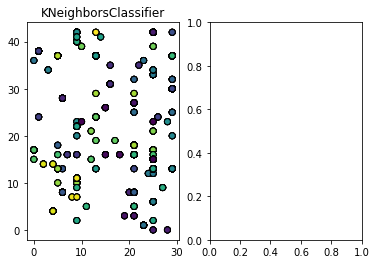

In [62]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_plottingdata, y)
nc = NearestCentroid().fit(X_plottingdata, y)


plt.figure
fig, axes = plt.subplots(1, 2)
for est, ax in [(knn, axes[0]), (nc, axes[1])]:
    ax.scatter(X_plottingdata[:, 0], X_plottingdata[:, 1], c=y_numerical, edgecolor='k')
    
    ax.set_title(est.__class__.__name__)
    plot_2d_classification(est, X_plottingdata, alpha=.5, ax=ax)
    ax.set_aspect("equal")